# 01_proximeta_summary

In [17]:
# Load packages
import pandas as pd
import os
import os.path as op
import sys
import csv
import numpy as np
import matplotlib
import glob
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt

# global options
pd.set_option('display.max_columns', None)

# file paths
path = '/Users/melissaherring/Google Drive/My Drive/MH_project/'
#path = '/Users/juliabrown/Google Drive/My Drive/projects/OMZvir_round2/MH_project/'

# load proximeta master table
proximeta = pd.read_csv(op.join(path, 'tables/proximeta_master.csv'))

## Virus type breakdown:

In [18]:
proximeta.groupby('virus_type').size().reset_index(name='count')

,virus_type,count
0,contig,295
1,unassociated vmag,195
2,uninfected mag,535
3,vmag,41


In this dataset, there are 295 viral contigs and 41 vmags that are associated with hosts. There are 195 vmags that are not associated with hosts. Lastly, there are 535 mags that are not associated with viruses.

In [20]:
virus_count = pd.DataFrame(proximeta.groupby(['sample_depth','virus_type']).size().reset_index(name='count'))
virus_count

,sample_depth,virus_type,count
0,80,contig,81
1,80,unassociated vmag,60
2,80,uninfected mag,129
3,80,vmag,15
4,95,contig,77
5,95,unassociated vmag,67
6,95,uninfected mag,143
7,95,vmag,10
8,140,contig,47
9,140,unassociated vmag,39


Text(0, 0.5, 'Count')

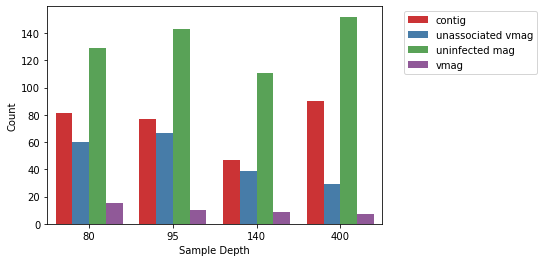

In [21]:
sns.barplot(x='sample_depth', y='count', hue='virus_type', data=virus_count, palette='Set1')
plt.legend(title='', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Sample Depth')
plt.ylabel('Count')

This figure shows how many viral contigs with hosts, vmags with no hosts associated, mags with no virus associated, and vmags with hosts per sample. Sample depth is on the x-axis and count is on the y-axis. Each bar is colored by type and each cluster of four differently colored bars represents a single depth. Red bars refer to viral contigs, blue bars refer to unassociated vmags, green bars refer to uninfected mags, and purple bars refer to vmags with associated hosts.

For every depth, there are more mags without associatec viruses than any other type. Viral contigs connected with hosts are the next abundant, followed by vmags not associated with hosts, and lastly followed by vmags associated with hosts.

The amount of uninfected mags and viral contigs don't appear to follow any patterns when considering only four depths. The unassociated vmags may decrease with increasing depth with the exception of 95 meters. However, there is evidence that the number of vmags associated with hosts decreases with increasing depth.

## Evaluating the Strength of Host-Virus Associations

### Plots: Distribution of adjusted_inter_vs_intra_ratio 

In [22]:
# each data frame is created by grouping vmag_assoc by sample_name and virus_type and getting the group corresponding to that data frame

jv119_contig = proximeta.groupby(['sample_name', 'virus_type'], as_index=False).get_group(('JV119', 'contig'))
jv119_vMAG = proximeta.groupby(['sample_name', 'virus_type'], as_index=False).get_group(('JV119', 'vmag'))
jv119_uninfect = proximeta.groupby(['sample_name', 'virus_type'], as_index=False).get_group(('JV119', 'uninfected mag'))


jv121_contig = proximeta.groupby(['sample_name', 'virus_type'], as_index=False).get_group(('JV121', 'contig'))
jv121_vMAG = proximeta.groupby(['sample_name', 'virus_type'], as_index=False).get_group(('JV121', 'vmag'))

jv132_contig = proximeta.groupby(['sample_name', 'virus_type'], as_index=False).get_group(('JV132', 'contig'))
jv132_vMAG = proximeta.groupby(['sample_name', 'virus_type'], as_index=False).get_group(('JV132', 'vmag'))

jv154_contig = proximeta.groupby(['sample_name', 'virus_type'], as_index=False).get_group(('JV154', 'contig'))
jv154_vMAG = proximeta.groupby(['sample_name', 'virus_type'], as_index=False).get_group(('JV154', 'vmag'))

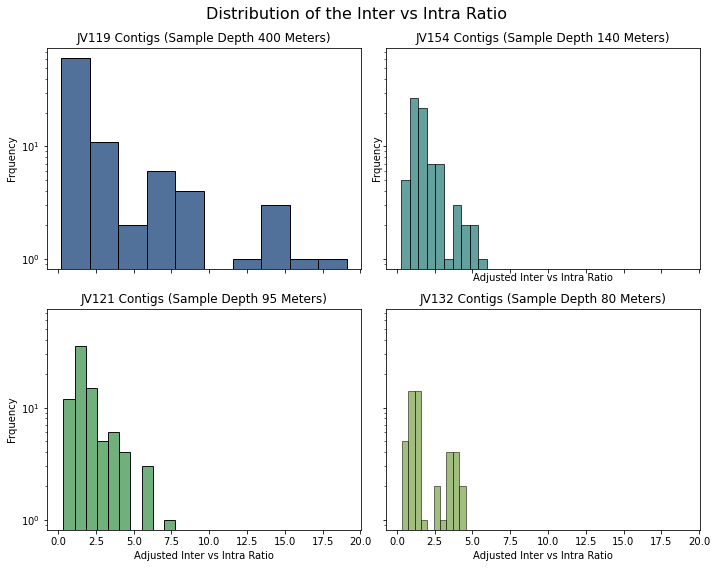

In [23]:
# plot contigs

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,8), sharex=True, sharey=True)

palette = sns.color_palette('gist_earth')

sns.histplot(jv119_contig['adjusted_inter_vs_intra_ratio'],ax= axes[0,0], bins=10, color=palette[0], edgecolor='black')
axes[0,0].set_xlabel('Adjusted Inter vs Intra Ratio')
axes[0,0].set_ylabel('Frquency')
axes[0,0].set_title('JV119 Contigs (Sample Depth 400 Meters)')
axes[0,0].set_yscale('log')

sns.histplot(jv154_contig['adjusted_inter_vs_intra_ratio'],ax= axes[1,1], bins=10, color=palette[3], edgecolor='black')
axes[0,1].set_xlabel('Adjusted Inter vs Intra Ratio')
axes[0,1].set_ylabel('Frquency')
axes[0,1].set_title('JV154 Contigs (Sample Depth 140 Meters)')
axes[0,1].set_yscale('log')

sns.histplot(jv121_contig['adjusted_inter_vs_intra_ratio'],ax= axes[0,1], bins=10, color=palette[1], edgecolor='black')
axes[1,0].set_xlabel('Adjusted Inter vs Intra Ratio')
axes[1,0].set_ylabel('Frquency')
axes[1,0].set_title('JV121 Contigs (Sample Depth 95 Meters)')
axes[1,0].set_yscale('log')

sns.histplot(jv132_contig['adjusted_inter_vs_intra_ratio'],ax= axes[1,0], bins=10, color=palette[2], edgecolor='black')
axes[1,1].set_xlabel('Adjusted Inter vs Intra Ratio')
axes[1,1].set_ylabel('Frquency')
axes[1,1].set_title('JV132 Contigs (Sample Depth 80 Meters)')
axes[1,1].set_yscale('log')

fig.suptitle('Distribution of the Inter vs Intra Ratio',fontsize=16)
plt.tight_layout() # minimize white space in figure

This set of plots shows the distribution of the adjusted_inter_vs_intra_ratio column for the contigs for all four samples. JV119 is on the top left, JV154 is on the top right, JV121 is on the bottom left, and JV132 is on the bottom right. The x-axes represent values of the inter vs intra ratio and the y-axes represent the frequency of each ratio value in the dataset.

There is evidence for a bimodal distributions for the samples JV119, JV154, and JV132. As depth generally decreases, it appears that this ratio is concentrated towards lower values.

A value close to one signals a 'real' infection between the host and the virus. 

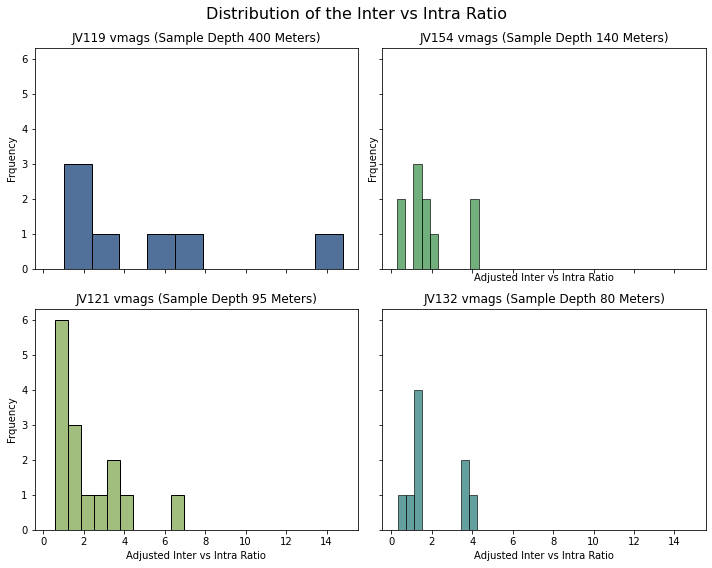

In [27]:
# plot all vmags

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,8), sharex=True, sharey=True)

palette = sns.color_palette('gist_earth')

sns.histplot(jv119_vMAG['adjusted_inter_vs_intra_ratio'],ax= axes[0,0], bins=10, color=palette[0], edgecolor='black')
axes[0,0].set_xlabel('Adjusted Inter vs Intra Ratio')
axes[0,0].set_ylabel('Frquency')
axes[0,0].set_title('JV119 vmags (Sample Depth 400 Meters)')

sns.histplot(jv154_vMAG['adjusted_inter_vs_intra_ratio'],ax= axes[1,1], bins=10, color=palette[1], edgecolor='black')
axes[0,1].set_xlabel('Adjusted Inter vs Intra Ratio')
axes[0,1].set_ylabel('Frquency')
axes[0,1].set_title('JV154 vmags (Sample Depth 140 Meters)')

sns.histplot(jv121_vMAG['adjusted_inter_vs_intra_ratio'],ax= axes[0,1], bins=10, color=palette[2], edgecolor='black')
axes[1,0].set_xlabel('Adjusted Inter vs Intra Ratio')
axes[1,0].set_ylabel('Frquency')
axes[1,0].set_title('JV121 vmags (Sample Depth 95 Meters)')

sns.histplot(jv132_vMAG['adjusted_inter_vs_intra_ratio'],ax= axes[1,0], bins=10, color=palette[3], edgecolor='black')
axes[1,1].set_xlabel('Adjusted Inter vs Intra Ratio')
axes[1,1].set_ylabel('Frquency')
axes[1,1].set_title('JV132 vmags (Sample Depth 80 Meters)')

fig.suptitle('Distribution of the Inter vs Intra Ratio',fontsize=16)
plt.tight_layout()

This set of plots shows the distribution of the adjusted_inter_vs_intra_ratio column for the vmags for all four samples. JV119 is on the top left, JV154 is on the top right, JV121 is on the bottom left, and JV132 is on the bottom right. The x-axes represent values of the inter vs intra ratio and the y-axes represent the frequency of each ratio value in the dataset. In general, there are a lot more contigs than vmags, so these plots are generated with less data, making it hard to make definitive conclusions from these plots alone.

There is could be some evidence for a bimodal distributions for all four samples.

A value close to one signals a 'real' infection between the host and the virus. 

These patterns and distributions appear similar to those of the adjusted_inter_vs_intra ratio of the viral contigs in the set of plots above.

### Plots: Distribution of adjusted_inter_connective_linkage_density

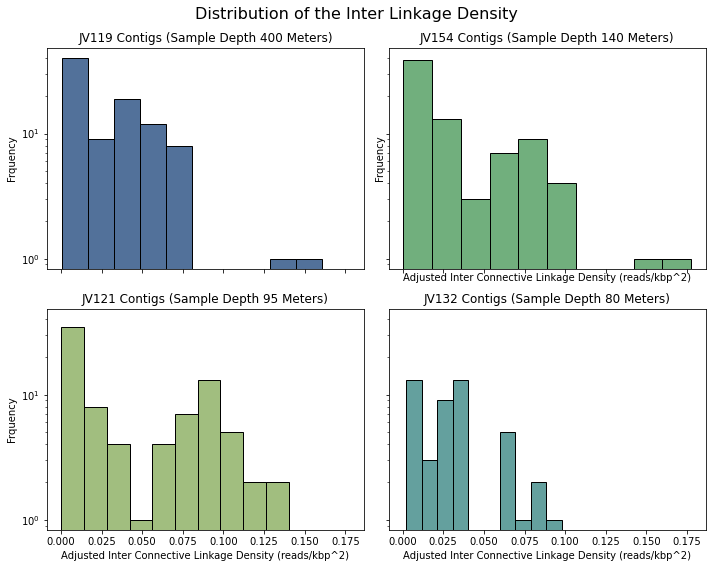

In [25]:
# plot contigs

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,8), sharex=True, sharey=True)

palette = sns.color_palette('gist_earth')

sns.histplot(jv119_contig['adjusted_inter_linkage_density'],ax= axes[0,0], bins=10, color=palette[0], edgecolor='black')
axes[0,0].set_xlabel('Adjusted Inter Connective Linkage Density (reads/kbp^2)')
axes[0,0].set_ylabel('Frquency')
axes[0,0].set_title('JV119 Contigs (Sample Depth 400 Meters)')
axes[0,0].set_yscale('log')

sns.histplot(jv154_contig['adjusted_inter_linkage_density'],ax= axes[1,1], bins=10, color=palette[1], edgecolor='black')
axes[0,1].set_xlabel('Adjusted Inter Connective Linkage Density (reads/kbp^2)')
axes[0,1].set_ylabel('Frquency')
axes[0,1].set_title('JV154 Contigs (Sample Depth 140 Meters)')
axes[0,1].set_yscale('log')

sns.histplot(jv121_contig['adjusted_inter_linkage_density'],ax= axes[0,1], bins=10, color=palette[2], edgecolor='black')
axes[1,0].set_xlabel('Adjusted Inter Connective Linkage Density (reads/kbp^2)')
axes[1,0].set_ylabel('Frquency')
axes[1,0].set_title('JV121 Contigs (Sample Depth 95 Meters)')
axes[1,0].set_yscale('log')

sns.histplot(jv132_contig['adjusted_inter_linkage_density'],ax= axes[1,0], bins=10, color=palette[3], edgecolor='black')
axes[1,1].set_xlabel('Adjusted Inter Connective Linkage Density (reads/kbp^2)')
axes[1,1].set_ylabel('Frquency')
axes[1,1].set_title('JV132 Contigs (Sample Depth 80 Meters)')
axes[1,1].set_yscale('log')

fig.suptitle('Distribution of the Inter Linkage Density',fontsize=16)
plt.tight_layout()

This set of plots shows the distribution of the adjusted_inter_connective_linkage_density column for the contigs for all four samples. JV119 is on the top left, JV154 is on the top right, JV121 is on the bottom left, and JV132 is on the bottom right. The x-axes represent values of the inter connective linkage density and the y-axes represent the frequency of each density value in the dataset.

There is could be some evidence for a bimodal distributions for all four samples.

A higher value means more linkage between the host and the virus.

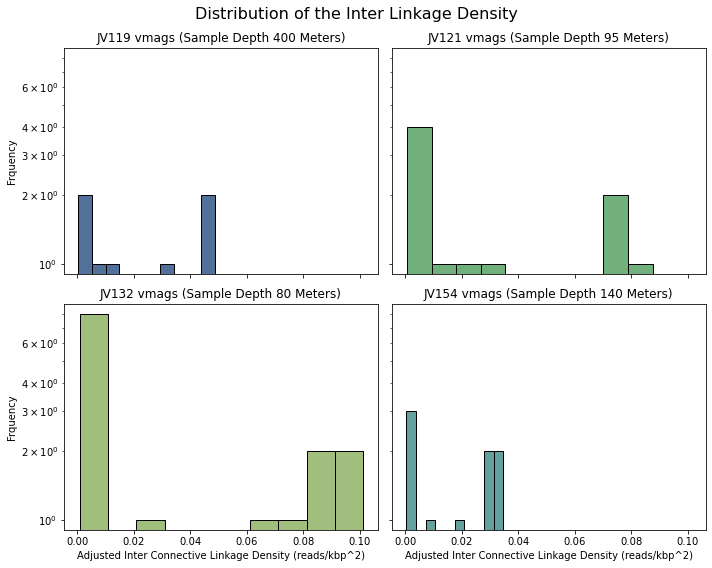

In [28]:
# plot all vMAGs together

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,8), sharex=True, sharey=True)

palette = sns.color_palette('gist_earth')

sns.histplot(jv119_vMAG['adjusted_inter_linkage_density'], bins=10, color=palette[0], edgecolor='black', ax= axes[0,0])
axes[0,0].set_xlabel('Adjusted Inter Connective Linkage Density (reads/kbp^2)')
axes[0,0].set_ylabel('Frquency')
axes[0,0].set_title('JV119 vmags (Sample Depth 400 Meters)')
axes[0,0].set_yscale('log')

sns.histplot(jv154_vMAG['adjusted_inter_linkage_density'], bins=10, color=palette[1], edgecolor='black', ax= axes[1,1])
axes[1,1].set_xlabel('Adjusted Inter Connective Linkage Density (reads/kbp^2)')
axes[1,1].set_ylabel('Frquency')
axes[1,1].set_title('JV154 vmags (Sample Depth 140 Meters)')
axes[1,1].set_yscale('log')

sns.histplot(jv121_vMAG['adjusted_inter_linkage_density'], bins=10, color=palette[2], edgecolor='black', ax= axes[0,1])
axes[0,1].set_xlabel('Adjusted Inter Connective Linkage Density (reads/kbp^2)')
axes[0,1].set_ylabel('Frquency')
axes[0,1].set_title('JV121 vmags (Sample Depth 95 Meters)')
axes[0,1].set_yscale('log')

sns.histplot(jv132_vMAG['adjusted_inter_linkage_density'], bins=10, color=palette[3], edgecolor='black', ax= axes[1,0])
axes[1,0].set_xlabel('Adjusted Inter Connective Linkage Density (reads/kbp^2)')
axes[1,0].set_ylabel('Frquency')
axes[1,0].set_title('JV132 vmags (Sample Depth 80 Meters)')
axes[1,0].set_yscale('log')

fig.suptitle('Distribution of the Inter Linkage Density',fontsize=16)
plt.tight_layout()

This set of plots shows the distribution of the adjusted_inter_connective_linkage_density column for the vmags for all four samples. JV119 is on the top left, JV154 is on the top right, JV121 is on the bottom left, and JV132 is on the bottom right. The x-axes represent values of the inter connective linkage density and the y-axes represent the frequency of each density value in the dataset. In general, there are a lot more contigs than vmags, so these plots are generated with less data, making it hard to make definitive conclusions from these plots alone.

There is could be some evidence for a bimodal distributions for all four samples.

A higher value means more linkage between the host and the virus.

These patterns and distributions may be similar to the adjusted_inter_connective_linkage_density for the viral contigs.

***NEXT STEP: ARE THERE PHYLOGENY PATTERNS ASSOCIATED WITH THESE METRICS? ARE THERE ONLY CERTAIN HOST TAXA BELONGING TO HIGHER OR LOWER VALUES?***

## Viral Copies per Cell

In [43]:
viruses = pd.concat([proximeta.groupby('virus_type').get_group('contig'),proximeta.groupby('virus_type').get_group('vmag'), ])
# Unassociated vmags are left out of this analysis because they don't have hosts and therefore don't have this metric.

In [48]:
palette = sns.color_palette("Set1")

# Get the list of color names in the palette
color_names = palette.as_hex()

color_names

['#e41a1c',
 '#377eb8',
 '#4daf4a',
 '#984ea3',
 '#ff7f00',
 '#ffff33',
 '#a65628',
 '#f781bf',
 '#999999']

In [47]:
# Display the color names
for idx, color in enumerate(color_names):
    print(f"Color {idx + 1}: {color}")

Color 1: #e41a1c
Color 2: #377eb8
Color 3: #4daf4a
Color 4: #984ea3
Color 5: #ff7f00
Color 6: #ffff33
Color 7: #a65628
Color 8: #f781bf
Color 9: #999999


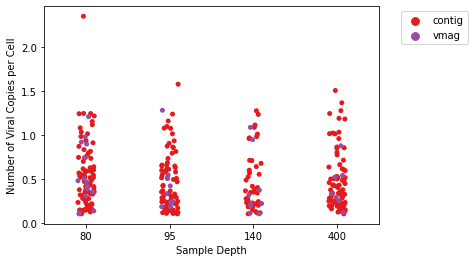

In [50]:
# create a jitterplot of vmag_assoc data frame with sample_depth on the x-axis, viral_copies_per_cell on the y-axis, and the data points colored by virus_type

custom_palette = {'contig': '#e41a1c', 'vmag': '#984ea3'}

sns.stripplot(x='sample_depth', y='viral_copies_per_cell', data=viruses, jitter=True, hue='virus_type',palette=custom_palette)
plt.xlabel('Sample Depth')
plt.ylabel('Number of Viral Copies per Cell')
plt.legend(title='', bbox_to_anchor=(1.05, 1), loc='upper left')

This figure shows how many viral copies per cell were detected for each sample depth. Sample depth is on the x-axis and number of viral copies per cell are on the y-axis. The points are colored by type. Red points refer to viral contigs and purple points refer to vmags.

There are more contig points (red) than vmag points (purple). There appears to be similar distributions of values for contigs and vmags for all four samples.

Most values over all four sample depths are between 0 and 1.5.

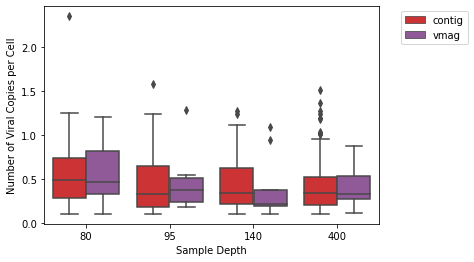

In [52]:
custom_palette = {'contig': '#e41a1c', 'vmag': '#984ea3'}

sns.boxplot(x='sample_depth', y='viral_copies_per_cell', data=viruses, hue='virus_type',palette=custom_palette)
plt.xlabel('Sample Depth')
plt.ylabel('Number of Viral Copies per Cell')
plt.legend(title='', bbox_to_anchor=(1.05, 1), loc='upper left')

This figure shows how many viral copies per cell were detected for each sample depth and displays the same data as the plot above in boxplot format. Sample depth is on the x-axis and number of viral copies per cell are on the y-axis. The boxes are colored by type. Red boxes refer to viral contigs and purple boxes refer to vmags.

The median values displayed as black lines going through the individual boxes are relatively similar between contigs and vmags for all four samples. The medians for both types appear to decrease from 80 to 95 meters, but stay relatively constant between 95, 140, and 400 meters.

## Number of Associated Viruses and the Total Number of vMAGs

In [72]:
# create a list of sample depths
sample_depth = [80,95,140,400]

# create a data frame of the number of vmags per depth for vmags associated with a host
vmag_host = proximeta.groupby('virus_type',as_index=False).get_group('vmag')
vmag_host_count = pd.DataFrame(vmag_host['sample_depth'].value_counts())
vmag_host_count.rename(columns={'sample_depth': 'count'}, inplace=True)
vmag_host_count['sample_depth'] = sample_depth
vmag_host_count['type'] = 'vmags associated with a host'

# create a data frame of the total number of vmags (connected to a host and not connected to a host) for each sample depth
vmag_tot = pd.concat([proximeta.groupby('virus_type',as_index=False).get_group('vmag'), proximeta.groupby('virus_type',as_index=False).get_group('unassociated vmag')]) 
vmag_tot_count = pd.DataFrame(vmag_tot['sample_depth'].value_counts())
vmag_tot_count.rename(columns={'sample_depth': 'count'}, inplace=True)
vmag_tot_count['sample_depth'] = sample_depth
vmag_tot_count['type'] = 'vmags total'

# merge the two vmag data frames from above to plot
vmag_plot = pd.concat([vmag_host_count,vmag_tot_count])
vmag_plot

,count,sample_depth,type
80,15,80,vmags associated with a host
95,10,95,vmags associated with a host
140,9,140,vmags associated with a host
400,7,400,vmags associated with a host
95,77,80,vmags total
80,75,95,vmags total
140,48,140,vmags total
400,36,400,vmags total


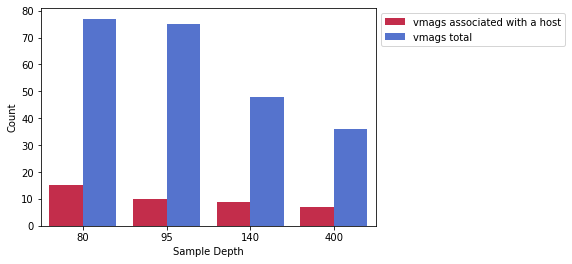

In [73]:
# create a custom color palette
custom_palette = ['crimson','royalblue']

# create a barplot of combo1 with sample_depth on the x-axis and count on the y-axis colored by the type column using the custom palette1
sns.barplot(x="sample_depth", y="count", hue="type", data=vmag_plot, palette=custom_palette)
plt.xlabel('Sample Depth')
plt.ylabel('Count')
plt.legend(title='',loc='upper left', bbox_to_anchor=(1, 1)) # set legend title and location outside of the plot

This plot shows the number of vmags associated with a host and the total number of vmags (associated with a host and not associated) for each sample depth. The x-axis is sample depth and the y-axis is the number of each type. Red bars represent vmags associated with a host and blue bars represent the total number of vmags.

For every sample depth, there is a smaller proportion of vmags associated with a host than those not associated. Both the total number of vmags and those associated with hosts generally decrease as depth increases.